In [374]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go
import math

init_notebook_mode(connected=True)

data_path_train = "res/cup98ID.shuf.5000.train.csv"
data_path_test = "res/cup98ID.shuf.5000.test.csv"
result_folder = "results/"

test_set_ratio=0.1

In [375]:
df_data = pd.read_csv(data_path_train)
df_test = pd.read_csv(data_path_test)
df_data.head(10) #2500x480

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9401,ESN,1,UT,84115,,,2212,0,,...,0,1,L,3,G,X,X,X,45.0,B
1,9501,ARB,1,MI,48118,,,3101,0,,...,0,1,L,1,F,X,X,X,15.0,A
2,8601,GRI,0,NC,28278,,,2601,0,,...,0,0,L,1,F,X,X,X,14.0,B
3,8801,DUR,0,CA,92404,,,4001,0,,...,0,1,L,1,F,X,X,X,22.0,A
4,9601,L23,1,IL,62002,,,3201,0,,...,0,1,L,1,G,X,X,X,49.0,A
5,9401,DEL,4002,TN,37405,,,3901,0,,...,0,0,L,1,G,X,X,X,32.0,B
6,8601,MBC,1002,AR,72851,,,0,0,,...,0,0,L,2,E,X,X,X,59.0,D
7,9301,OMH,2,GA,30534,,,0,0,,...,0,1,L,2,F,X,X,X,44.0,D
8,9601,YKA,28,TX,79536,,,5601,0,,...,0,1,L,1,F,X,X,X,58.0,C
9,9501,VIK,1,CA,92562,,,0,0,,...,0,0,L,1,G,X,X,X,15.0,A


In [376]:
#print(df_data.isnull().values.sum())
l_n_b = df_data.isnull().sum()>=2500
print(df_data.loc[:,l_n_b].head(5))
# drop completely empty columns
df_data = df_data.drop(['RDATE_5', 'RAMNT_5'], axis=1)
df_test = df_test.drop(['RDATE_5', 'RAMNT_5'], axis=1)
df_data.head(5) # 2500 x 478

   RDATE_5  RAMNT_5
0      NaN      NaN
1      NaN      NaN
2      NaN      NaN
3      NaN      NaN
4      NaN      NaN


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9401,ESN,1,UT,84115,,,2212,0,,...,0,1,L,3,G,X,X,X,45.0,B
1,9501,ARB,1,MI,48118,,,3101,0,,...,0,1,L,1,F,X,X,X,15.0,A
2,8601,GRI,0,NC,28278,,,2601,0,,...,0,0,L,1,F,X,X,X,14.0,B
3,8801,DUR,0,CA,92404,,,4001,0,,...,0,1,L,1,F,X,X,X,22.0,A
4,9601,L23,1,IL,62002,,,3201,0,,...,0,1,L,1,G,X,X,X,49.0,A


In [377]:
# overview over missing values
l_n_b = df_data.isnull().sum()>0
print(df_data.loc[:,l_n_b])
df_data.loc[:,l_n_b].isnull().sum()

       AGE  NUMCHLD  INCOME  WEALTH1  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  \
0     75.0      NaN     2.0      1.0      0.0       0.0      6.0       0.0   
1     67.0      NaN     4.0      8.0      1.0       1.0      1.0       0.0   
2     72.0      3.0     6.0      NaN      NaN       NaN      NaN       NaN   
3     58.0      NaN     2.0      3.0      0.0       0.0      1.0       0.0   
4     66.0      1.0     4.0      1.0      0.0       0.0      1.0       1.0   
5     59.0      NaN     4.0      8.0      NaN       NaN      NaN       NaN   
6      NaN      NaN     NaN      NaN      NaN       NaN      NaN       NaN   
7      NaN      NaN     NaN      NaN      NaN       NaN      NaN       NaN   
8     42.0      NaN     NaN      NaN      NaN       NaN      NaN       NaN   
9      NaN      NaN     NaN      NaN      NaN       NaN      NaN       NaN   
10    69.0      NaN     4.0      6.0      0.0       0.0      4.0       0.0   
11    61.0      NaN     NaN      NaN      NaN       NaN      NaN

AGE          604
NUMCHLD     2193
INCOME       533
WEALTH1     1154
MBCRAFT     1355
MBGARDEN    1355
MBBOOKS     1355
MBCOLECT    1355
MAGFAML     1355
MAGFEM      1355
MAGMALE     1355
PUBGARDN    1355
PUBCULIN    1355
PUBHLTH     1355
PUBDOITY    1355
PUBNEWFN    1355
PUBPHOTO    1355
PUBOPP      1355
WEALTH2     1143
MSA            1
ADI            1
DMA            1
ADATE_3       61
ADATE_4       64
ADATE_5      884
ADATE_6       82
ADATE_7      244
ADATE_8       96
ADATE_9      282
ADATE_10     847
            ... 
RDATE_20    2298
RDATE_21    2251
RDATE_22    1928
RDATE_23    2284
RDATE_24    2015
RAMNT_3     2497
RAMNT_4     2492
RAMNT_6     2480
RAMNT_7     2258
RAMNT_8     1906
RAMNT_9     2076
RAMNT_10    2247
RAMNT_11    2065
RAMNT_12    1844
RAMNT_13    2180
RAMNT_14    1914
RAMNT_15    2302
RAMNT_16    1816
RAMNT_17    2243
RAMNT_18    1971
RAMNT_19    2044
RAMNT_20    2298
RAMNT_21    2251
RAMNT_22    1928
RAMNT_23    2284
RAMNT_24    2015
NEXTDATE     265
TIMELAG      2

In [378]:
# handle missing categorical values
cat_df_data = df_data.select_dtypes(include=['object']).copy()
cat_df_test = df_test.select_dtypes(include=['object']).copy()
l_n_b = cat_df_data.isnull().sum()>0
l_n_b_test = cat_df_test.isnull().sum()>0
# cat_df_data.loc[:,l_n_b].head(10) #only geocode2
cat_df_data = cat_df_data.fillna('')
cat_df_test = cat_df_test.fillna('')
# cat_df_data.loc[850:860,l_n_b]

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
cat_df_data = cat_df_data.apply(enc.fit_transform) # categorical values - one hot encoding (73 object columns)
cat_df_test = cat_df_test.apply(enc.fit_transform)
cat_df_data.head(5)

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,89,35,1533,0,0,0,0,0,0,4,...,0,66,26,45,0,3,3,2,1,3
1,24,18,647,0,0,0,0,0,0,4,...,67,75,0,0,0,2,3,2,1,2
2,114,23,62,0,0,0,0,0,0,4,...,73,82,2,0,0,2,3,2,1,3
3,84,5,1790,0,0,0,0,0,0,4,...,5,5,2,3,0,2,3,2,1,2
4,167,13,1056,0,0,0,0,0,0,4,...,0,0,0,0,0,3,3,2,1,2


In [379]:
# handle missing numerical values
#from sklearn.preprocessing import Imputer
df_numeric = df_data.select_dtypes(include=['int64','float64'])
df_numeric = df_numeric.fillna(df_numeric.mean())

df_numeric_test = df_test.select_dtypes(include=['int64','float64'])
df_numeric_test = df_numeric_test.fillna(df_numeric_test.mean())

In [380]:
df_data = pd.concat([df_numeric, cat_df_data], axis=1)
df_test = pd.concat([df_numeric_test, cat_df_test], axis=1)
df_data.head(10)

,ODATEDW,TCODE,DOB,NOEXCH,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,9401,1,2212,0,75.000000,1.537459,2.000000,1.000000,17,0.000000,...,0,66,26,45,0,3,3,2,1,3
1,9501,1,3101,0,67.000000,1.537459,4.000000,8.000000,11,1.000000,...,67,75,0,0,0,2,3,2,1,2
2,8601,0,2601,0,72.000000,3.000000,6.000000,5.358098,0,0.149345,...,73,82,2,0,0,2,3,2,1,3
3,8801,0,4001,0,58.000000,1.537459,2.000000,3.000000,9,0.000000,...,5,5,2,3,0,2,3,2,1,2
4,9601,1,3201,0,66.000000,1.000000,4.000000,1.000000,15,0.000000,...,0,0,0,0,0,3,3,2,1,2
5,9401,4002,3901,0,59.000000,1.537459,4.000000,8.000000,0,0.149345,...,51,58,21,24,0,3,3,2,1,3
6,8601,1002,0,0,61.739451,1.537459,3.966955,5.358098,0,0.149345,...,72,81,1,1,0,1,3,2,1,5
7,9301,2,0,0,61.739451,1.537459,3.966955,5.358098,0,0.149345,...,34,41,0,0,0,2,3,2,1,5
8,9601,28,5601,0,42.000000,1.537459,3.966955,5.358098,0,0.149345,...,0,0,0,0,0,2,3,2,1,4
9,9501,1,0,0,61.739451,1.537459,3.966955,5.358098,0,0.149345,...,0,0,0,0,0,3,3,2,1,2


In [352]:
df_train = df_data

In [381]:
df_data.iloc[:,400:402].describe()

,CONTROLN,TARGET_D
count,2500.000000,2500.000000
mean,94384.298800,0.842000
std,54604.374483,4.130552
min,82.000000,0.000000
25%,48008.500000,0.000000
50%,94057.000000,0.000000
75%,141465.250000,0.000000
max,191604.000000,75.000000


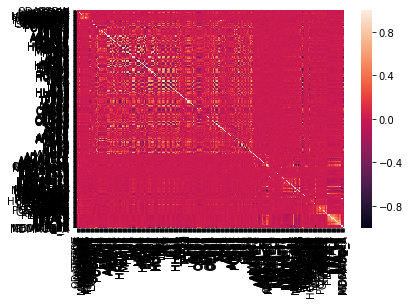

In [382]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df_data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [354]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

pca = PCA()
X=df_data
X_reduced = pca.fit_transform(scale(X))
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

D:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.



array([ 8.86, 15.32, 20.7 , 23.96, 27.07, 29.84, 31.9 , 33.76, 35.37,
       36.84, 38.2 , 39.51, 40.67, 41.7 , 42.65, 43.57, 44.43, 45.23,
       46.02, 46.76, 47.46, 48.15, 48.81, 49.47, 50.1 , 50.72, 51.29,
       51.84, 52.37, 52.89, 53.39, 53.88, 54.36, 54.82, 55.27, 55.72,
       56.15, 56.57, 56.98, 57.39, 57.79, 58.18, 58.56, 58.94, 59.32,
       59.69, 60.06, 60.42, 60.78, 61.13, 61.48, 61.82, 62.16, 62.5 ,
       62.83, 63.15, 63.46, 63.77, 64.08, 64.39, 64.69, 64.99, 65.29,
       65.59, 65.88, 66.17, 66.46, 66.75, 67.03, 67.31, 67.59, 67.86,
       68.13, 68.4 , 68.67, 68.93, 69.19, 69.45, 69.71, 69.97, 70.22,
       70.47, 70.72, 70.97, 71.22, 71.47, 71.72, 71.96, 72.2 , 72.44,
       72.68, 72.92, 73.15, 73.38, 73.61, 73.84, 74.07, 74.3 , 74.52,
       74.74, 74.96, 75.18, 75.4 , 75.62, 75.84, 76.05, 76.26, 76.47,
       76.68, 76.89, 77.1 , 77.31, 77.52, 77.72, 77.92, 78.12, 78.32,
       78.52, 78.72, 78.92, 79.12, 79.31, 79.5 , 79.69, 79.88, 80.07,
       80.26, 80.45,

## Baseline (mean target_d)

In [384]:
#pred = df_train['TARGET_D'].median()
#base_mse = mean_squared_error(df_test['TARGET_D'], [pred for x in df_test['TARGET_D']])
#print("Baseline MSE: " + str(base_mse))
#print("RMSE: " + str(math.sqrt(base_mse)))

### Initialize Training data

In [385]:
df_vars = df_train.loc[:, df_train.columns != 'TARGET_D']
df_class = df_train['TARGET_D']

X_train, X_test, y_train, y_test = train_test_split(df_vars, df_class, test_size=test_set_ratio, random_state=0)

In [386]:
X_test

,ODATEDW,TCODE,DOB,NOEXCH,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
53,8601,2,5612,0,41.000000,1.537459,6.000000,1.000000,2,0.000000,...,5,5,2,3,0,3,3,2,1,3
2391,9501,1,6801,0,30.000000,1.537459,7.000000,9.000000,1,0.000000,...,0,0,0,0,0,2,3,2,1,2
2310,9401,1,2101,0,77.000000,1.537459,3.000000,7.000000,21,0.000000,...,26,26,19,23,0,3,3,2,1,4
728,9501,0,5301,0,45.000000,1.537459,6.000000,9.000000,2,0.000000,...,66,74,0,0,0,1,3,2,1,3
850,9401,0,5801,0,40.000000,1.537459,3.000000,5.358098,0,0.149345,...,48,55,0,0,0,2,3,2,1,2
1635,9401,0,3401,0,64.000000,1.537459,7.000000,3.000000,3,0.000000,...,50,57,18,24,0,3,3,2,1,3
1417,9201,0,0,0,61.739451,1.537459,5.000000,8.000000,0,0.149345,...,0,19,14,17,0,1,3,2,1,3
1118,9201,1,6201,0,36.000000,1.537459,3.000000,5.358098,0,0.149345,...,3,3,0,1,0,3,3,2,1,3
2083,9601,0,3601,0,62.000000,1.537459,2.000000,5.358098,0,0.149345,...,0,0,0,0,0,2,3,2,1,4
703,9101,1002,3101,0,67.000000,1.537459,3.966955,5.358098,0,0.149345,...,15,15,15,13,0,3,3,2,1,5


In [392]:
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

reg = tree.DecisionTreeRegressor(min_samples_split=20)
scores = cross_validate(reg, df_vars, df_class, cv=10, scoring='neg_mean_squared_error')
scores

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True



{'fit_time': array([1.48498511, 1.68699861, 1.75052476, 1.78398299, 1.68099332,
        1.77398276, 1.39198709, 1.41349316, 1.4645257 , 1.38098669]),
 'score_time': array([0.00299978, 0.00300002, 0.00299954, 0.00200009, 0.00499892,
        0.00300455, 0.0030005 , 0.00299954, 0.00199938, 0.00200152]),
 'test_score': array([-31.3408785 , -23.63452575, -46.04899116, -30.40287181,
        -34.68182818, -48.05282875, -34.4083263 , -30.02653894,
        -34.80925109, -33.32400199]),
 'train_score': array([-7.45269816, -6.75805828, -5.63873323, -7.05291656, -7.64677213,
        -6.88580248, -6.94744998, -7.65085473, -6.79778758, -7.20721952])}

### Model fitting and sample testing

In [393]:
model = reg.fit(X_train, y_train)
model.score(X_test, y_test)

-0.19546961948087738

### Final prediction

In [394]:
df_res = pd.DataFrame()
df_res['CONTROLN'] = df_test['CONTROLN']
df_res['TARGET_D'] = pd.Series(model.predict(df_test))
df_res.head(10)
export_file_name = result_folder + "kdd_prediction_rf.csv"
df_res.to_csv(export_file_name, index=False)

### Export

In [ ]:
export_file_name = result_folder + "kdd_linear.csv"
df_res.to_csv(export_file_name, index=False)

### Easy comparison

In [365]:
import traceback
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn import preprocessing
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor, KDTree, BallTree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

df_vars_all = df_train.loc[:, df_train.columns != 'TARGET_D']
df_class = df_train['TARGET_D']

scaler = StandardScaler()
df_vars_all = scaler.fit_transform(df_vars_all)

names = [#"Linear", 
         "Ridge",
         "Elastic Net", 
         #"PLS",
        "Decision Tree", "Random Forest",
        "AdaBoost"]

classifiers = [
    #linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
    #PLSRegression(),
    tree.DecisionTreeRegressor(min_samples_split=20),
    RandomForestRegressor(n_estimators=100),
    AdaBoostRegressor()
]

cl_scores = {}
df_vars = df_vars_all
scoring = {'mse': 'neg_mean_squared_error',
          'mae': 'neg_median_absolute_error'}

for name, clf in zip(names, classifiers):
    try:
        np.random.seed(32143421)
        scores = cross_validate(clf, df_vars, df_class, cv=10, scoring=scoring, return_train_score=True)
        cl_scores[name] = scores
        for score in scoring:
            print(name,"--",score,"-- Training Set --", "Mean", scores['train_'+score].mean(), "-- Min", scores['train_'+score].min(), "-- Max", scores['train_'+score].max())
            print(name,"--",score,"-- Test Set --", "Mean", scores['test_'+score].mean(), "-- Min", scores['test_'+score].min(), "-- Max", scores['test_'+score].max())
    except:
        print("Regression failed for", name)
        traceback.print_exc()

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.



Ridge -- mse -- Training Set -- Mean -12.676520375790753 -- Min -13.061272905319088 -- Max -11.79124341637058
Ridge -- mse -- Test Set -- Mean -28.09493645404836 -- Min -44.324002653490055 -- Max -16.265402315191828
Ridge -- mae -- Training Set -- Mean -1.1773203970073514 -- Min -1.209940188255049 -- Max -1.1201452161305796
Ridge -- mae -- Test Set -- Mean -1.4348475537704077 -- Min -1.6188186446672717 -- Max -1.313392716923713
Elastic Net -- mse -- Training Set -- Mean -16.842804043372823 -- Min -17.55470125837424 -- Max -14.952220444444444
Elastic Net -- mse -- Test Set -- Mean -17.11151504811019 -- Min -35.977376000000014 -- Max -10.471466259058278
Elastic Net -- mae -- Training Set -- Mean -0.8403360501063591 -- Min -0.8610360095313933 -- Max -0.799978565261597
Elastic Net -- mae -- Test Set -- Mean -0.8403360501063591 -- Min -0.8610360095313933 -- Max -0.799978565261597
Decision Tree -- mse -- Training Set -- Mean -6.962476207925202 -- Min -7.623068431178958 -- Max -5.637251746103

### all features
Nearest Centroid -- Training Set -- Mean 0.7496791822186778 -- Min 0.7279005524861878 -- Max 0.7724039829302988
Nearest Centroid -- Test Set -- Mean 0.6628582456264915 -- Min 0.5873015873015873 -- Max 0.7543859649122807
Linear SVM -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Linear SVM -- Test Set -- Mean 0.9560670435070409 -- Min 0.9191919191919192 -- Max 1.0
Decision Tree -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Decision Tree -- Test Set -- Mean 0.9458952341983844 -- Min 0.9 -- Max 1.0
Naive Bayes -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Naive Bayes -- Test Set -- Mean 0.35593122949313594 -- Min 0.2727272727272727 -- Max 0.42857142857142855

In [366]:
import plotly.io as pio
traces = []
for clf_name in names:
    traces.append(go.Box(
        y=cl_scores[clf_name]['test_mse']*-1,
        boxpoints='all',
        name=clf_name
    ))
    
layout = go.Layout(title="MSE on Test Set (KDD Cup 1998)")
    
py.iplot(go.Figure(data=traces, layout=layout))
#pio.write_image(go.Figure(data=traces, layout=layout), 'kdd_boxplot.pdf')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_vars.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
trace = []
names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]
feature_counts = [1,2,5,10,20,30,40,50,100,500,1000,10000]#, "All"]
for idx, feature_count in enumerate(feature_counts):
    for cl in names:
        for score in cl_scores[cl][idx]['test_score']:
            trace.append({'score': score, 'x':idx, 'name':feature_count, 'classifier':cl})
df_trace = pd.DataFrame.from_dict(trace)

E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



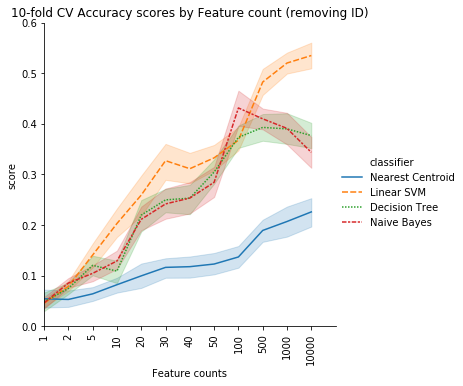

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(x="x", y="score", kind="line", hue="classifier", style="classifier", data=df_trace)
plt.xticks(range(len(feature_counts)), feature_counts, rotation='vertical')
plt.xlabel("Feature counts")
plt.title("10-fold CV Accuracy scores by Feature count (removing ID)")
axes = plt.gca()
axes.set_ylim([0.0,0.6])
axes.set_xlim([0,len(feature_counts)])
plt.savefig('feature_cnt_eval_wo_ID.pdf')
plt.show()

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
#df_vars_all = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']
selector = SelectKBest(chi2, k=1)
selector.fit(df_vars_all, df_class)
cols = selector.get_support(indices=True)
best_features = df_vars_all.columns[cols]
#df_vars = SelectKBest(chi2, k=1).fit_transform(df_vars_all, df_class)
best_features

Index(['ID'], dtype='object')

In [4]:
df_train.columns

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V9992', 'V9993', 'V9994', 'V9995', 'V9996', 'V9997', 'V9998', 'V9999',
       'V10000', 'Class'],
      dtype='object', length=10002)

In [68]:
class_labels = sorted(df_train['Class'].unique(), key=lambda s: s.lower())
df_res = pd.DataFrame()
df_res['CONTROLN'] = df_test['CONTROLN']
df_res['TARGET_D'] = df_test['CONTROLN'].apply(lambda x: class_labels[(x-1)//30])
df_res.head(10)

,ID,class
0,656,Harp
1,949,Mark
2,255,CFH
3,21,Agresti
4,1412,Vision
5,278,Chachra
6,81,Auken
7,1475,Wilson
8,955,Mark
9,1400,Vernon


In [69]:
export_file_name = result_folder + "kdd_prediction.csv"
df_res.to_csv(export_file_name, index=False)